In [58]:
print("hello world we are creating a zodiac sign " \
"predictor we will train the model with fake data after " \
"that we make more advanced model with knn and few shot learining")

hello world we are creating a zodiac sign predictor we will train the model with fake data after that we make more advanced model with knn and few shot learining


In [23]:
import pandas as pd
import numpy as np
import random

In [35]:
 zodiacs=["Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo", "Libra", "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"]
 features=["risk_taking", "emotionality", "leadership", "organization", "sociability", "patience", "flexibility", "conflict_avoidance", "social_initiative", "control_need", "zodiac"]

In [21]:
print(zodiacs)
print(features)

['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']
['risk_taking', 'emotionality', 'leadership', 'organization', 'sociability', 'patience', 'flexibility', 'conflict_avoidance', 'social_initiative', 'control_need']


In [22]:
# rating = 1 = very low, 2 = low, 3 = medium, 4 = high, 5 = very high

In [36]:
def generate_zodiac_data(zodiac , num_samples = 1):
    samples = []
    profiles = {
        "Aries":       [(4,5), (1,3), (4,5), (1,3), (4,5), (1,2), (3,5), (1,2), (5,5), (4,5)],
        "Taurus":      [(1,3), (2,4), (1,3), (4,5), (2,3), (4,5), (1,2), (3,5), (1,2), (4,5)],
        "Gemini":      [(3,5), (1,3), (2,4), (1,2), (5,5), (1,2), (5,5), (2,4), (5,5), (1,3)],
        "Cancer":      [(1,3), (5,5), (2,4), (3,5), (2,4), (4,5), (2,3), (4,5), (2,3), (3,5)],
        "Leo":         [(4,5), (3,5), (5,5), (2,4), (5,5), (2,3), (3,4), (1,2), (5,5), (5,5)],
        "Virgo":       [(1,2), (1,3), (2,4), (5,5), (2,4), (4,5), (1,2), (3,5), (2,4), (4,5)],
        "Libra":       [(2,4), (3,5), (2,4), (2,4), (5,5), (3,4), (4,5), (5,5), (4,5), (1,3)],
        "Scorpio":     [(4,5), (4,5), (4,5), (3,5), (1,3), (3,5), (1,2), (1,2), (2,4), (5,5)],
        "Sagittarius": [(5,5), (2,4), (3,5), (1,2), (5,5), (1,2), (5,5), (2,4), (5,5), (1,2)],
        "Capricorn":   [(2,4), (1,2), (5,5), (5,5), (2,3), (4,5), (1,2), (2,4), (3,5), (5,5)],
        "Aquarius":    [(3,5), (1,3), (3,5), (2,4), (4,5), (3,4), (5,5), (2,4), (4,5), (2,4)],
        "Pisces":      [(1,3), (5,5), (1,3), (1,3), (3,5), (4,5), (4,5), (5,5), (2,3), (1,3)]
    }
    for _ in range(num_samples):
        ranges = profiles[zodiac]
        sample = [random.randint(r[0], r[1]) for r in ranges]
        sample.append(zodiac)
        samples.append(sample)
    return samples

all_data = []
for z in zodiacs:
  all_data.extend(generate_zodiac_data(z, 50)) 

df = pd.DataFrame(all_data, columns= features)

In [37]:
display(df)

,risk_taking,emotionality,leadership,organization,sociability,patience,flexibility,conflict_avoidance,social_initiative,control_need,zodiac
0,5,2,5,1,4,2,3,2,5,5,Aries
1,4,3,4,1,4,1,4,1,5,4,Aries
2,4,2,4,3,5,1,5,1,5,4,Aries
3,4,3,5,1,5,1,5,2,5,4,Aries
4,5,2,4,2,4,1,4,2,5,5,Aries
...,...,...,...,...,...,...,...,...,...,...,...
595,3,5,1,2,4,5,5,5,3,1,Pisces
596,1,5,2,2,5,5,4,5,2,3,Pisces
597,2,5,1,3,5,5,4,5,3,2,Pisces
598,3,5,2,1,5,5,4,5,3,1,Pisces


In [50]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
X = df.drop("zodiac", axis=1)
y = df["zodiac"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Model accuracy: {acc:.2f}%")

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

    Aquarius       1.00      1.00      1.00         9
       Aries       1.00      1.00      1.00         8
      Cancer       1.00      1.00      1.00        10
   Capricorn       1.00      1.00      1.00         6
      Gemini       0.91      1.00      0.95        10
         Leo       1.00      1.00      1.00        11
       Libra       0.89      1.00      0.94         8
      Pisces       1.00      0.93      0.97        15
 Sagittarius       1.00      0.91      0.95        11
     Scorpio       1.00      1.00      1.00         9
      Taurus       1.00      0.87      0.93        15
       Virgo       0.80      1.00      0.89         8

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.97      0.97      0.97       120



In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

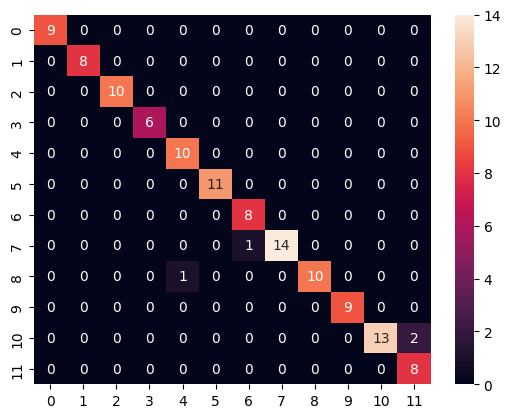

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [55]:
# random forest model
from sklearn.ensemble import RandomForestClassifier


In [57]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)

acc_rf = accuracy_score(y_test, y_rf_pred) * 100
print(f"Random Forest Model accuracy: {acc_rf:.2f}%")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))


Random Forest Model accuracy: 98.33%
Random Forest Classification Report:
              precision    recall  f1-score   support

    Aquarius       1.00      1.00      1.00         9
       Aries       1.00      1.00      1.00         8
      Cancer       1.00      1.00      1.00        10
   Capricorn       1.00      1.00      1.00         6
      Gemini       0.91      1.00      0.95        10
         Leo       1.00      1.00      1.00        11
       Libra       1.00      1.00      1.00         8
      Pisces       1.00      1.00      1.00        15
 Sagittarius       1.00      0.91      0.95        11
     Scorpio       1.00      1.00      1.00         9
      Taurus       0.94      1.00      0.97        15
       Virgo       1.00      0.88      0.93         8

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [63]:
user_inputs = []
for feature in features[:-1]:
    val = int(input(f"{feature}"))
    user_inputs.append(val)

result = rf_clf.predict([user_inputs])
print(result)

['Aries']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
def train_evolving_model(synthetic_df, csv_path="user_zodiac_data.csv"):
    # 1. Gerçek kullanıcı verilerini yükle
    try:
        real_data_df = pd.read_csv(csv_path)
        # Sadece gerekli sütunları al (tahmin edilen burcu eğitimden çıkar)
        # CSV formatının: risk, emo, ..., zodiac, predicted_zodiac şeklinde olduğunu varsayıyorum
        real_data_df = real_data_df[features] # Senin önceden tanımladığın 'features' listesi
        has_real_data = True
    except (FileNotFoundError, pd.errors.EmptyDataError):
        has_real_data = False

    # 2. Sentetik ve Gerçek Veriyi Birleştir
    if has_real_data:
        full_df = pd.concat([synthetic_df, real_data_df], ignore_index=True)
        
        # 3. AĞIRLIKLANDIRMA (Incremental Thinking)
        # Sentetiklere 1, Gerçek verilere 15 ağırlık ver (Etkiyi artırmak için 15 seçtim)
        weights = [1] * len(synthetic_df) + [15] * len(real_data_df)
    else:
        full_df = synthetic_df
        weights = [1] * len(synthetic_df)

    # 4. Modeli Eğit
    X = full_df.drop('zodiac', axis=1)
    y = full_df['zodiac']
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y, sample_weight=weights)
    
    return model, full_df

In [71]:
train_evolving_model(df, csv_path="user_zodiac_data.csv")

(RandomForestClassifier(random_state=42),
      risk_taking  emotionality  leadership  organization  sociability  \
 0              5             2           5             1            4   
 1              4             3           4             1            4   
 2              4             2           4             3            5   
 3              4             3           5             1            5   
 4              5             2           4             2            4   
 ..           ...           ...         ...           ...          ...   
 596            1             5           2             2            5   
 597            2             5           1             3            5   
 598            3             5           2             1            5   
 599            3             5           1             1            3   
 600            4             2           4             2            4   
 
      patience  flexibility  conflict_avoidance  social_initiative  

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
def apply_cbr_with_knn(synthetic_df, csv_path="user_zodiac_data.csv", k=3):
    try:
        real_data_df = pd.read_csv(csv_path)
        real_data_df = real_data_df[features] 
        full_df = pd.concat([synthetic_df, real_data_df], ignore_index=True)
        

        real_data_repeated = pd.concat([real_data_df] * 10, ignore_index=True)
        full_df = pd.concat([synthetic_df, real_data_repeated], ignore_index=True)
    except:
        full_df = synthetic_df

    X = full_df.drop('zodiac', axis=1)
    y = full_df['zodiac']


    knn_cbr = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_cbr.fit(X, y)
    
    return knn_cbr, full_df

In [82]:
knn_model = apply_cbr_with_knn(df, k=3)

In [85]:
# Get KNN model and the full training dataframe
knn_model, full_df = apply_cbr_with_knn(df, k=3)

# Show the number of rows and preview the last few rows
display(full_df.shape)
display(full_df.tail())

(630, 11)

,risk_taking,emotionality,leadership,organization,sociability,patience,flexibility,conflict_avoidance,social_initiative,control_need,zodiac
625,4,2,4,2,4,1,3,1,4,4,Leo
626,2,5,3,4,3,4,3,4,3,4,Cancer
627,4,2,4,2,4,2,2,1,5,5,Leo
628,4,2,4,2,4,1,3,1,4,4,Leo
629,2,5,3,4,3,4,3,4,3,4,Cancer


In [79]:
import joblib
import pickle
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn_model, f)
joblib.dump(clf, "log_model.joblib")
joblib.dump(rf_clf, "rf_model.joblib")

['rf_model.joblib']